In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
raw_image = cv2.imread('/Users/klm/Downloads/license_plate.jpg')

In [65]:
type(raw_image)

numpy.ndarray

In [66]:
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

In [67]:
identity_kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
sharpen_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
edge_kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
edge_kernel2 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
outline_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
gaussian_kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

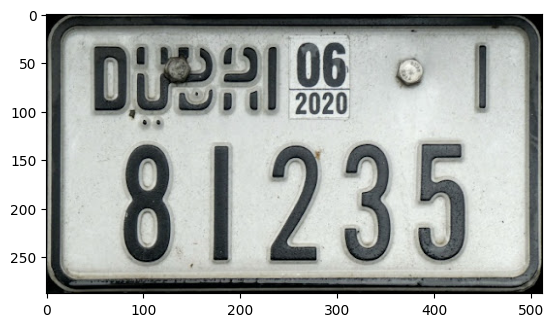

In [68]:
identity_image = cv2.filter2D(src=raw_image,ddepth =-1, kernel = identity_kernel)
plt.imshow(identity_image)

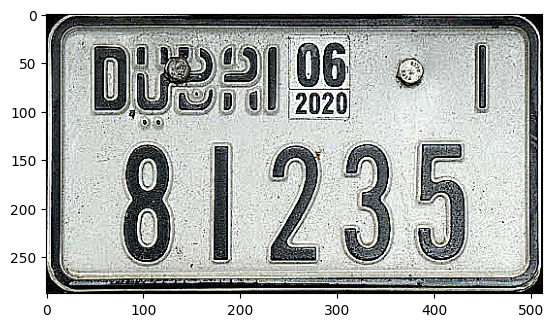

In [69]:
sharpen_image = cv2.filter2D(src=raw_image,ddepth =-1, kernel = sharpen_kernel)
plt.imshow(sharpen_image)

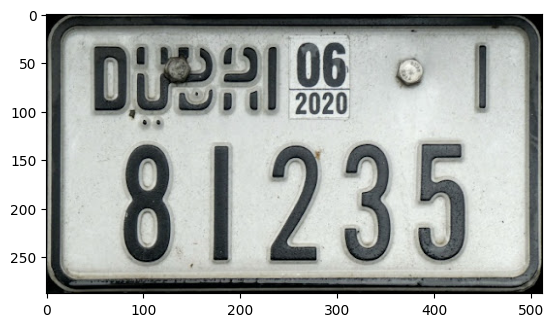

In [70]:
outline_image = cv2.filter2D(src=raw_image,ddepth =-1, kernel = outline_kernel)
plt.imshow(identity_image)

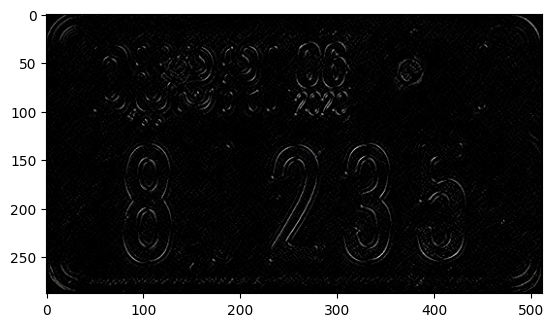

In [71]:
edge_image = cv2.filter2D(src=raw_image,ddepth =-1, kernel = edge_kernel)
plt.imshow(edge_image)

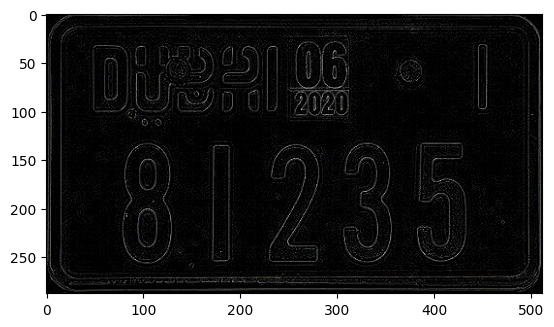

In [72]:
edge2_image = cv2.filter2D(src=raw_image,ddepth =-1, kernel = edge_kernel2)
plt.imshow(edge2_image)

In [73]:
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)


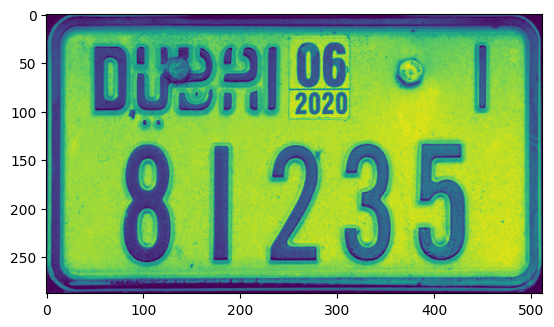

In [78]:
plt.imshow(gray_image)

In [74]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


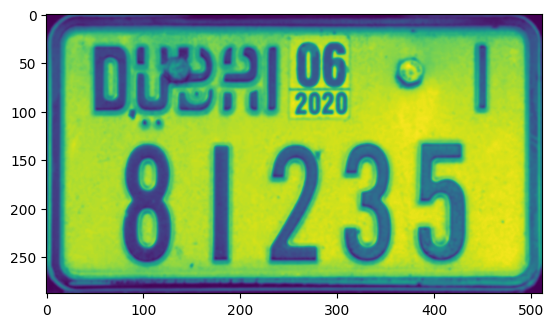

In [80]:
plt.imshow(blurred_image)

In [75]:
thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)


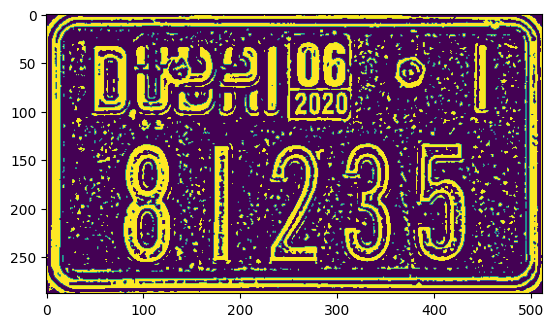

In [81]:
plt.imshow(thresh_image)

In [76]:
contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


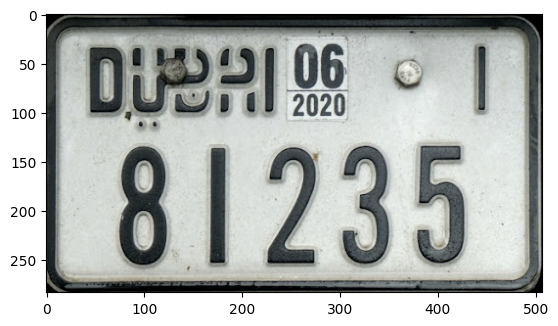

In [88]:
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)


cropped_image = raw_image[y:y+h, x:x+w]


plt.imshow(cropped_image)
plt.show()

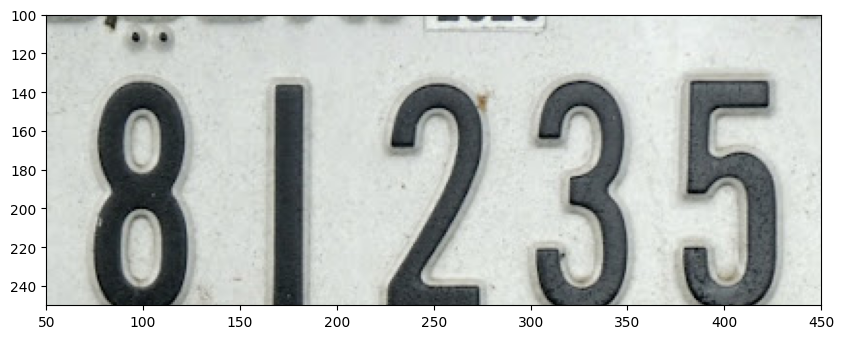

In [89]:
plt.figure(figsize=(10, 5))
plt.imshow(cropped_image)
plt.xlim(50, 450)  
plt.ylim(100, 250) 
plt.gca().invert_yaxis() 
plt.show()